In [1]:
using Revise

In [2]:
using QuadGK
using Plots

In [3]:
f(x) = sqrt(1 - x^2)

f (generic function with 1 method)

In [4]:
integral, err = quadgk(f, -1, 1, rtol = 1e-10)

(1.5707963268013143, 1.113777400132307e-10)

In [5]:
abtol = abs(integral - π / 2)

6.41775521614818e-12

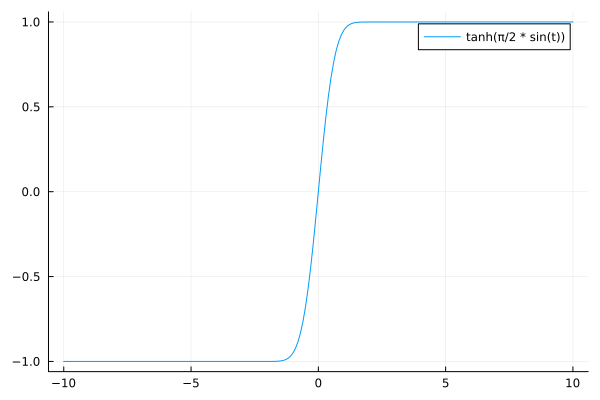

In [6]:
t = -10:0.1:10
x = tanh.(π/2 .* sinh.(t))
plot(t, x, label = "tanh(π/2 * sin(t))", legend = :topright)

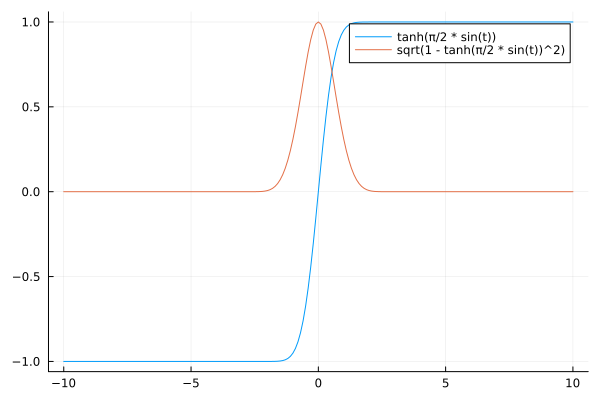

In [7]:
f1(t) = sqrt(1 - tanh(π/2 * sinh(t))^2)
integral, err = quadgk(f1, -10, 10, rtol = 1e-10)
abtol = abs(integral - π / 2)
plot!(t, f1.(t), label = "sqrt(1 - tanh(π/2 * sin(t))^2)", legend = :topright)

In [8]:
function double_exponential_integrate(f; N=100, ts = 0.1)
    result = 0.0

    for k in -N:N
        t = k * ts
        x = tanh(π/2 * sinh(t))
        dxdt = π/2 * cosh(t) * (1 / cosh(π/2 * sinh(t))^2)
        h = ts * dxdt

        result += f(x) * h
    end
    return result
end

double_exponential_integrate (generic function with 1 method)

In [9]:
double_exponential_integrate(f)

1.5707963267948963

In [10]:
@show I = double_exponential_integrate(f)
@show error = abs(I - π / 2)

I = double_exponential_integrate(f) = 1.5707963267948963
error = abs(I - π / 2) = 2.220446049250313e-16


2.220446049250313e-16